# Q1 - Putnam Problem
Given a random permutation of 1,2,..., n <br>
Find the expected # of local maxima

In [31]:
import pandas as pd
import numpy as np

In [32]:
# Define a function to run simulation

def find_n_maxima(n):
    values     = np.random.randint(low = 1, high = n+1, size = n)
    maxima_idx = []
    
    for idx, value in enumerate(values):
        if idx > 0 and idx < len(values) - 1:
            neighbours    = [values[idx-1], values[idx+1]]
        elif idx == 0:
            neighbours    = [values[idx+1]]
        elif idx < len(values) - 1:
            neighbours    = [values[idx-1]]
            
        if value > max(neighbours):
            maxima_idx.append(idx)
    
    return len(maxima_idx)

In [33]:
# Run simulations

n      = 31
n_sims = 1000000

results = []

for _ in range(n_sims):
    results.append(find_n_maxima(n))

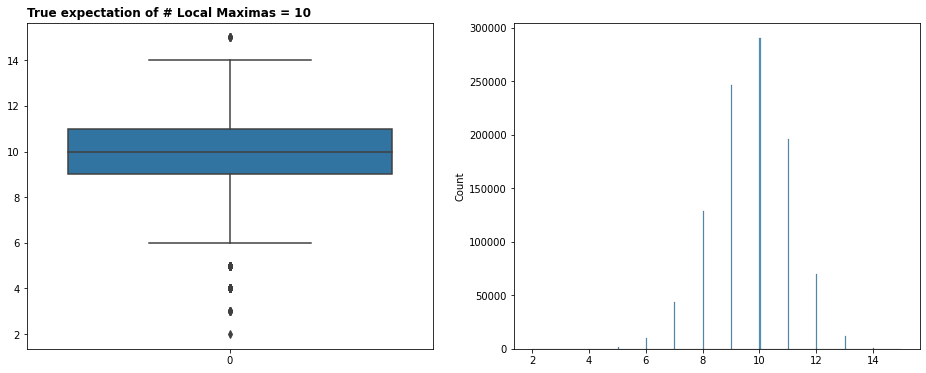

In [34]:
# Plot results

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.boxplot(data = results, orient = 'v', ax = ax1)
sns.histplot(data = results, ax = ax2)

expectation = (n-1)/3
ax1.set_title('True expectation of # Local Maximas = {:.0f}'.format(expectation), loc = 'left', fontweight = 'bold')

plt.show()